In [4]:
# Importing essential libraries
import pandas as pd # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt # For data visualization 
import seaborn as sns # For advanced visualizations like heatmaps, barplots

# To ignore unnecessary warnings during model building / plotting
import warnings 
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("demographic.csv") #Load the dataset 
data

,index,flag_bad,de_age,de_gender,de_date_joined,de_num_friends,de_monthly_salary,de_employment_type,de_employment_duration,de_accomodation_type,...,de_children,ph_total_contacts,ph_other_device_info,ph_call_log_stats,ph_country_code,ph_app_list,fb_gender,fb_dob,fb_last_updated_date,fb_relation
0,0,0,26,1,08/04/2018 14:50,2535,3000000,1,51,4,...,0,66,"{""device_codename"": ""HM2014817"", ""brand"": ""Xia...","{""percent_incoming_nighttime"": 1.83, ""percent_...",id,"['com.google.android.music', 'com.facebook.orc...",male,11/23/1991,2017-12-21T04:38:00+0000,Married
1,1,0,22,1,02/01/2018 17:17,685,4000000,1,28,4,...,0,69,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...",id,"['com.google.android.instantapps.supervisor', ...",male,01/20/1995,2017-11-25T17:23:09+0000,NaN
2,2,1,32,1,01/01/2018 16:39,1765,7000000,1,35,4,...,2,315,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 6.65, ""percent_...",id,"['com.tencent.ibg.joox', 'com.mrgames.larvaact...",male,10/13/1985,2017-12-23T18:05:57+0000,Married
3,3,0,31,2,04/01/2018 22:36,407,20000000,3,37,4,...,2,84,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...",id,"['com.kfit.fave', 'app.bpjs.mobile', 'com.redd...",female,07/27/1986,2017-12-05T09:37:19+0000,Married
4,4,0,27,1,02/01/2018 18:12,3064,3000000,1,36,4,...,0,0,"{""device_codename"": ""1609"", ""brand"": ""vivo""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...",id,"['com.lenovo.anyshare.gps', 'com.UCMobile.intl...",male,07/05/1990,2017-12-03T09:09:48+0000,In a relationship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41017,41017,0,27,2,11/07/2018 22:23,997,5000000,2,51,4,...,2,1026,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 5.66, ""percent_...",id,"['com.instagram.android', 'com.google.android....",NaN,NaN,NaN,NaN
41018,41018,0,26,1,11/07/2018 20:28,955,3000000,2,24,4,...,0,0,"{""device_codename"": ""nikel"", ""brand"": ""Xiaomi""}","{""percent_incoming_nighttime"": 10.71, ""percent...",id,"['com.youmusic.magictiles', 'com.ayopop', 'com...",NaN,NaN,NaN,NaN
41019,41019,0,22,2,11/07/2018 23:33,881,3000000,1,9,4,...,0,272,"{""device_codename"": ""a33g"", ""brand"": ""samsung""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...",id,"['com.grabtaxi.passenger', 'jp.co.translimit.b...",female,10/02/1995,2017-10-25T08:05:13+0000,NaN
41020,41020,0,29,2,11/07/2018 22:03,540,6000000,1,51,4,...,0,0,"{""device_codename"": ""santoni"", ""brand"": ""Xiaomi""}","{""percent_incoming_nighttime"": 1.27, ""percent_...",id,"['cn.wps.moffice_eng', 'com.vuclip.viu', 'com....",NaN,NaN,NaN,NaN


In [6]:
data.info() # Check the data types, non-null counts, and overall structure of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41022 entries, 0 to 41021
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   41022 non-null  int64 
 1   flag_bad                41022 non-null  int64 
 2   de_age                  41022 non-null  int64 
 3   de_gender               41022 non-null  int64 
 4   de_date_joined          41022 non-null  object
 5   de_num_friends          41022 non-null  int64 
 6   de_monthly_salary       41022 non-null  int64 
 7   de_employment_type      41022 non-null  int64 
 8   de_employment_duration  41022 non-null  int64 
 9   de_accomodation_type    41022 non-null  int64 
 10  de_education            41022 non-null  int64 
 11  de_marital_status       41022 non-null  int64 
 12  de_children             41022 non-null  int64 
 13  ph_total_contacts       41022 non-null  int64 
 14  ph_other_device_info    41022 non-null  object
 15  ph

In [7]:
data.head() # print first 5 elements

,index,flag_bad,de_age,de_gender,de_date_joined,de_num_friends,de_monthly_salary,de_employment_type,de_employment_duration,de_accomodation_type,...,de_children,ph_total_contacts,ph_other_device_info,ph_call_log_stats,ph_country_code,ph_app_list,fb_gender,fb_dob,fb_last_updated_date,fb_relation
0,0,0,26,1,08/04/2018 14:50,2535,3000000,1,51,4,...,0,66,"{""device_codename"": ""HM2014817"", ""brand"": ""Xia...","{""percent_incoming_nighttime"": 1.83, ""percent_...",id,"['com.google.android.music', 'com.facebook.orc...",male,11/23/1991,2017-12-21T04:38:00+0000,Married
1,1,0,22,1,02/01/2018 17:17,685,4000000,1,28,4,...,0,69,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...",id,"['com.google.android.instantapps.supervisor', ...",male,01/20/1995,2017-11-25T17:23:09+0000,NaN
2,2,1,32,1,01/01/2018 16:39,1765,7000000,1,35,4,...,2,315,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 6.65, ""percent_...",id,"['com.tencent.ibg.joox', 'com.mrgames.larvaact...",male,10/13/1985,2017-12-23T18:05:57+0000,Married
3,3,0,31,2,04/01/2018 22:36,407,20000000,3,37,4,...,2,84,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...",id,"['com.kfit.fave', 'app.bpjs.mobile', 'com.redd...",female,07/27/1986,2017-12-05T09:37:19+0000,Married
4,4,0,27,1,02/01/2018 18:12,3064,3000000,1,36,4,...,0,0,"{""device_codename"": ""1609"", ""brand"": ""vivo""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...",id,"['com.lenovo.anyshare.gps', 'com.UCMobile.intl...",male,07/05/1990,2017-12-03T09:09:48+0000,In a relationship


In [8]:
data.isnull().sum() #check for the null values 

index                         0
flag_bad                      0
de_age                        0
de_gender                     0
de_date_joined                0
de_num_friends                0
de_monthly_salary             0
de_employment_type            0
de_employment_duration        0
de_accomodation_type          0
de_education                  0
de_marital_status             0
de_children                   0
ph_total_contacts             0
ph_other_device_info          0
ph_call_log_stats          2087
ph_country_code              25
ph_app_list                   0
fb_gender                  1513
fb_dob                     9653
fb_last_updated_date       1470
fb_relation               26461
dtype: int64

In [9]:
data.describe() # Get summary statistics for all numeric columns

,index,flag_bad,de_age,de_gender,de_num_friends,de_monthly_salary,de_employment_type,de_employment_duration,de_accomodation_type,de_education,de_marital_status,de_children,ph_total_contacts
count,41022.000000,41022.000000,41022.000000,41022.000000,41022.000000,4.102200e+04,41022.000000,41022.000000,41022.0,41022.000000,41022.000000,41022.000000,41022.000000
mean,20510.500000,0.129687,28.170908,1.388474,1270.023987,5.182707e+06,1.397177,33.437887,4.0,2.636268,1.537858,0.706962,127.032568
std,11842.175708,0.335962,6.537795,0.487409,1188.849670,3.751306e+06,0.689464,16.586586,0.0,0.950850,0.569079,0.929021,319.078176
min,0.000000,0.000000,18.000000,1.000000,-1.000000,0.000000e+00,1.000000,0.000000,4.0,1.000000,1.000000,0.000000,0.000000
25%,10255.250000,0.000000,23.000000,1.000000,437.000000,3.000000e+06,1.000000,18.000000,4.0,2.000000,1.000000,0.000000,0.000000
50%,20510.500000,0.000000,27.000000,1.000000,867.000000,4.000000e+06,1.000000,36.000000,4.0,2.000000,2.000000,0.000000,0.000000
75%,30765.750000,0.000000,32.000000,2.000000,1663.000000,5.000000e+06,2.000000,51.000000,4.0,3.000000,2.000000,1.000000,144.000000
max,41021.000000,1.000000,73.000000,2.000000,5000.000000,4.100000e+07,4.000000,51.000000,4.0,5.000000,4.000000,4.000000,17315.000000


In [10]:
# Rename selected columns for easier reference throughout the notebook
data.rename(columns={
    'de_age': 'age',
    'de_gender': 'gender',
    'de_monthly_salary': 'salary',
    'de_num_friends': 'friends',
    'de_employment_type': 'employment_type',
    'de_employment_duration': 'employment_duration',
    'de_education': 'education',
    'de_marital_status': 'marital_status',
    'de_children': 'children'
}, inplace=True)

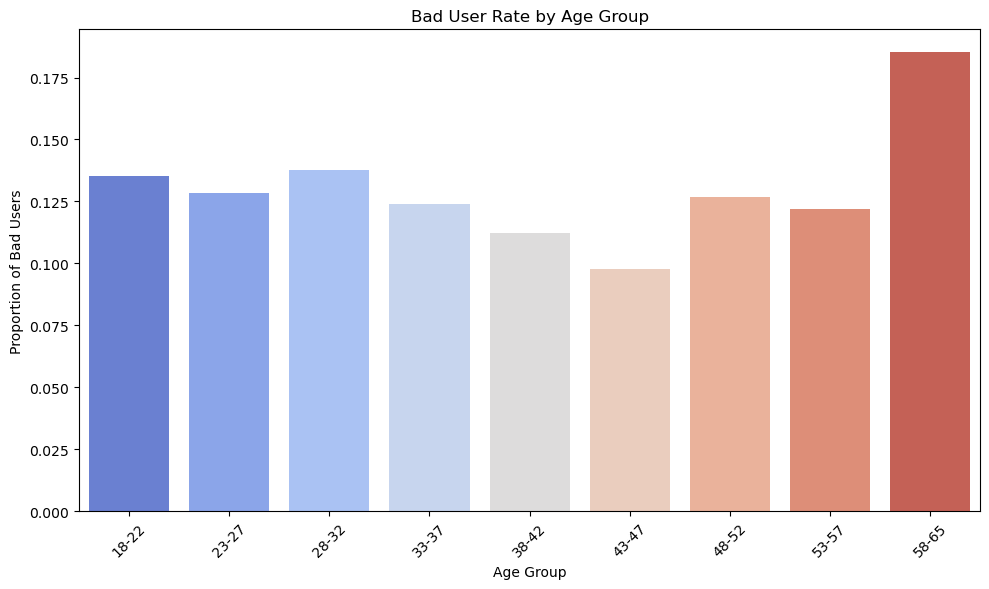

In [11]:
# 1. Create age bins and labels
bins = [17, 22, 27, 32, 37, 42, 47, 52, 57, 65]
labels = ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52', '53-57', '58-65']

# 2. Apply age binning
data['age_bin'] = pd.cut(data['age'], bins=bins, labels=labels)

# 3. Group by age bin and calculate average bad flag rate
age_bad_rate = data.groupby('age_bin')['flag_bad'].mean().reset_index()
age_bad_rate.columns = ['Age Group', 'Bad Flag Rate']

# 4. Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(data=age_bad_rate, x='Age Group', y='Bad Flag Rate', palette='coolwarm')
plt.title('Bad User Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Bad Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

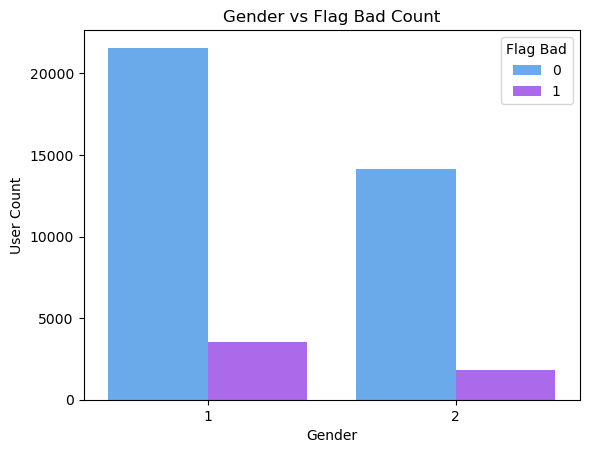

In [12]:
# Count plot to visualize the distribution of genders and their corresponding flag_bad status
sns.countplot(data=data, x=data['gender'].astype(str), hue=data['flag_bad'].astype(str), palette='cool')
plt.title('Gender vs Flag Bad Count')
plt.xlabel('Gender')
plt.ylabel('User Count')
plt.legend(title='Flag Bad')
plt.show()

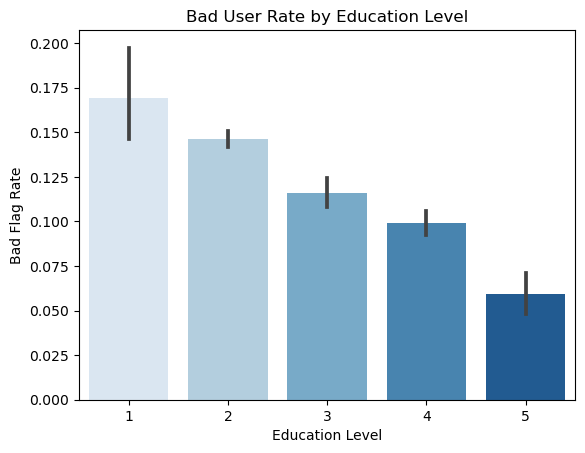

In [13]:
# Bar plot showing average 'flag_bad' rate across different education levels
sns.barplot(data=data, x='education', y='flag_bad', palette='Blues')
plt.title('Bad User Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Bad Flag Rate')
plt.show()

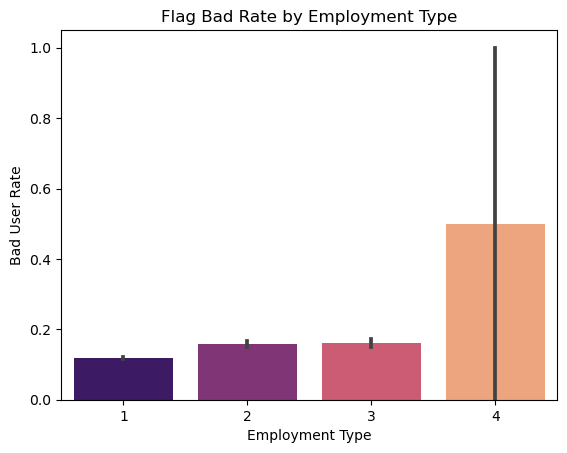

In [14]:
# Bar plot showing the average bad user rate across different employment types
sns.barplot(data=data, x='employment_type', y='flag_bad', palette='magma')
plt.title('Flag Bad Rate by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Bad User Rate')
plt.show()

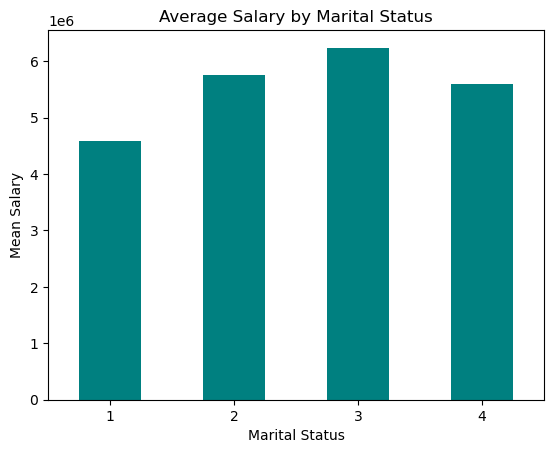

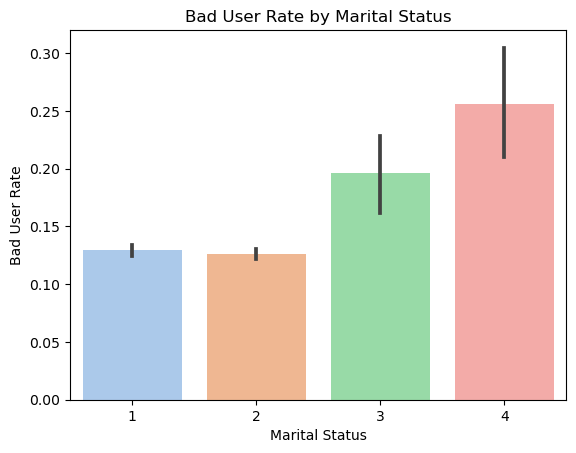

In [15]:
# Average salary per marital status
data.groupby('marital_status')['salary'].mean().plot(kind='bar', color='teal')
plt.title('Average Salary by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Mean Salary')
plt.xticks(rotation=0)
plt.show()

# Flag bad by marital status
sns.barplot(data=data, x='marital_status', y='flag_bad', palette='pastel')
plt.title('Bad User Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Bad User Rate')
plt.xticks(rotation=0)
plt.show()

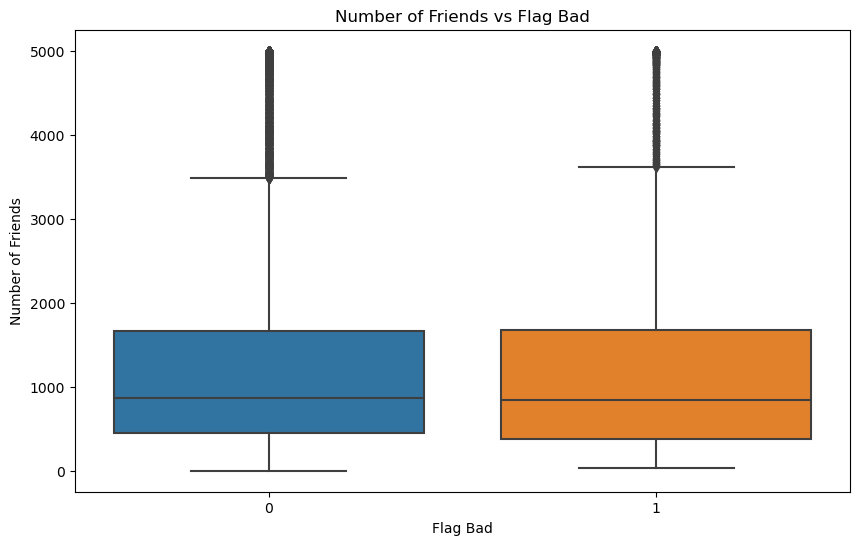

In [16]:
# Boxplot to compare the number of friends between good (0) and bad (1) users
plt.figure(figsize=(10, 6))
sns.boxplot(x='flag_bad', y='friends', data=data)
plt.title('Number of Friends vs Flag Bad')
plt.xlabel('Flag Bad')
plt.ylabel('Number of Friends')
plt.show()

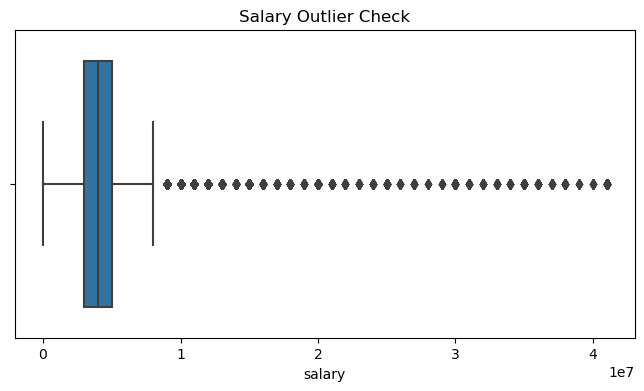

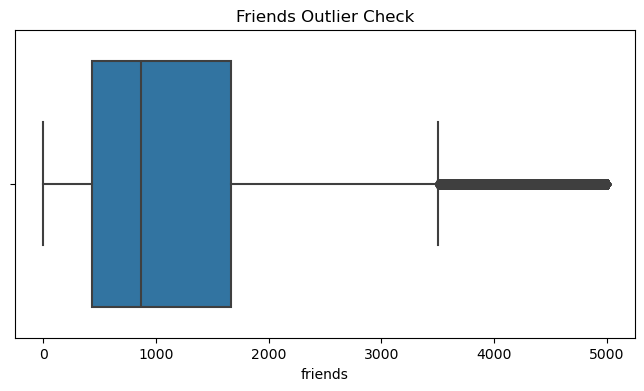

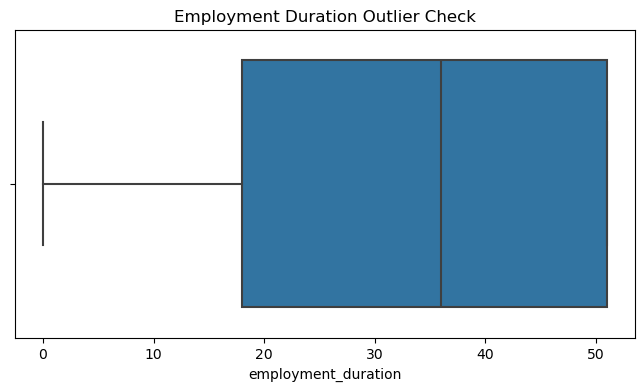

In [17]:
# Salary
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='salary')
plt.title('Salary Outlier Check')
plt.show()

# Friends
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='friends')
plt.title('Friends Outlier Check')
plt.show()

# Employment Duration
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='employment_duration')
plt.title('Employment Duration Outlier Check')
plt.show()

In [18]:
#Handle Outliers with IQR Method (Capping)
def cap_outliers_iqr(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: lower if x < lower else upper if x > upper else x)

# Apply to needed columns
cap_outliers_iqr('salary')
cap_outliers_iqr('friends')
cap_outliers_iqr('employment_duration')

<Axes: xlabel='salary'>

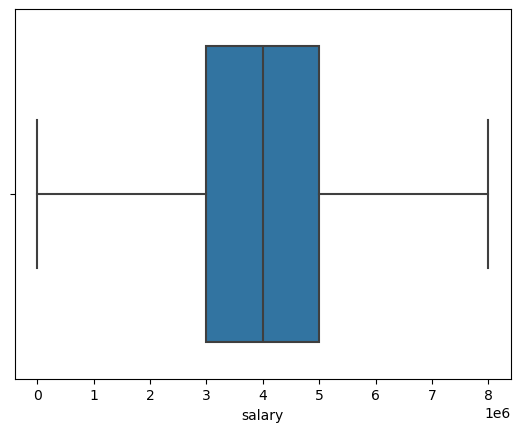

In [19]:
sns.boxplot(data=data, x='salary')  # after capping

In [20]:
data.drop_duplicates(inplace=True) # Drop duplicate rows to avoid data redundancy or leakage

In [21]:
# Separate numeric and categorical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include='object').columns

# 1. Fill numeric columns with median
for col in num_cols:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].median())

# 2. Fill categorical columns with mode
for col in cat_cols:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mode()[0])

In [22]:
from sklearn.preprocessing import LabelEncoder

# 1. Label Encoding for education
le_edu = LabelEncoder()
data['education'] = le_edu.fit_transform(data['education'])

# 2. Label Encoding for employment_type
le_emp = LabelEncoder()
data['employment_type'] = le_emp.fit_transform(data['employment_type'])

# 3. Gender Mapping (1 = Male, 2 = Female → 0 and 1)
data['gender'] = data['gender'].map({1: 0, 2: 1})

# 4. One-Hot Encoding for marital_status
data = pd.get_dummies(data, columns=['marital_status'], drop_first=True)

In [23]:
# Define the feature columns to be used for model training
features = [
    'age',
    'salary',
    'friends',
    'employment_duration',
    'education',
    'employment_type',
    'gender',
    'marital_status_2',
    'marital_status_3',
    'marital_status_4'
]
# Separate features and target
X = data[features]
y = data['flag_bad']

In [24]:
target = 'flag_bad' # Assign target column name to a variable for flexibility

In [25]:
from sklearn.utils import resample

# Step 1: Combine features and target into a single DataFrame for resampling
df_train = X.copy()
df_train['flag_bad'] = y

# Step 2: Split the data into majority (class 0) and minority (class 1)
df_majority = df_train[df_train.flag_bad == 0]
df_minority = df_train[df_train.flag_bad == 1]

# Step 3: Undersample majority class to match the size of the minority class
df_majority_under = resample(df_majority,
                             replace=False,
                             n_samples=len(df_minority),
                             random_state=42)

# Step 4: Combine undersampled majority class with minority class
df_undersampled = pd.concat([df_majority_under, df_minority])

# Step 5: Shuffle the combined dataset to mix class 0 and 1 rows
df_undersampled = df_undersampled.sample(frac=1, random_state=42)

# Step 6: Separate features and target again for training
X_under = df_undersampled.drop('flag_bad', axis=1)
y_under = df_undersampled['flag_bad']

In [26]:
from sklearn.model_selection import train_test_split
# Split the undersampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42,
                                                    stratify=y_under) ## Maintain class balance in train and test sets

In [27]:
from sklearn.preprocessing import StandardScaler
# Step 1: Initialize the scaler
scaler = StandardScaler()
# Step 2: Fit the scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Model
lr_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000) #class_weight='balanced': important due to class imbalance.
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.58      0.56      0.57      1064
           1       0.58      0.59      0.58      1064

    accuracy                           0.58      2128
   macro avg       0.58      0.58      0.58      2128
weighted avg       0.58      0.58      0.58      2128

Confusion Matrix:
 [[600 464]
 [433 631]]


In [29]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
print(" Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


 Random Forest Report:
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      1064
           1       0.59      0.61      0.60      1064

    accuracy                           0.60      2128
   macro avg       0.60      0.60      0.60      2128
weighted avg       0.60      0.60      0.60      2128

Confusion Matrix:
 [[620 444]
 [413 651]]


In [30]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
#predict
y_pred = model.predict(X_test_scaled)

#evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59      1064
           1       0.59      0.62      0.60      1064

    accuracy                           0.60      2128
   macro avg       0.60      0.60      0.60      2128
weighted avg       0.60      0.60      0.60      2128

Confusion Matrix:
 [[615 449]
 [408 656]]


In [31]:
#XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

#predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

#evaluate
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.57      0.56      1064
           1       0.56      0.55      0.55      1064

    accuracy                           0.56      2128
   macro avg       0.56      0.56      0.56      2128
weighted avg       0.56      0.56      0.56      2128

Confusion Matrix:
 [[606 458]
 [482 582]]


In [32]:
!pip install optuna

In [33]:
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0)
    }

    model = GradientBoostingClassifier(**params, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    return f1_score(y_test, y_pred)  # You can also try 'recall' or 'precision'

In [34]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)  # try more trials for better results

[I 2025-07-11 12:28:56,218] A new study created in memory with name: no-name-93952fad-2642-4f83-84fb-1e70e16cf619
[I 2025-07-11 12:29:02,691] Trial 0 finished with value: 0.5683720930232558 and parameters: {'n_estimators': 375, 'max_depth': 8, 'learning_rate': 0.1783672515978157, 'min_samples_split': 4, 'min_samples_leaf': 1, 'subsample': 0.9919217830410231}. Best is trial 0 with value: 0.5683720930232558.
[I 2025-07-11 12:29:08,188] Trial 1 finished with value: 0.5514018691588786 and parameters: {'n_estimators': 349, 'max_depth': 8, 'learning_rate': 0.20733736394149233, 'min_samples_split': 6, 'min_samples_leaf': 1, 'subsample': 0.6875590164107994}. Best is trial 0 with value: 0.5683720930232558.
[I 2025-07-11 12:29:13,778] Trial 2 finished with value: 0.556440281030445 and parameters: {'n_estimators': 384, 'max_depth': 8, 'learning_rate': 0.247870140706851, 'min_samples_split': 5, 'min_samples_leaf': 2, 'subsample': 0.5566632939080971}. Best is trial 0 with value: 0.5683720930232558.

In [35]:
print("Best Parameters:", study.best_params)

best_model = GradientBoostingClassifier(**study.best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

y_pred_final = best_model.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix
print("Tuned Gradient Boosting Report:\n", classification_report(y_test, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))

Best Parameters: {'n_estimators': 118, 'max_depth': 4, 'learning_rate': 0.0746202577672132, 'min_samples_split': 8, 'min_samples_leaf': 5, 'subsample': 0.9622758799925701}
Tuned Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.61      0.60      0.60      1064
           1       0.61      0.62      0.61      1064

    accuracy                           0.61      2128
   macro avg       0.61      0.61      0.61      2128
weighted avg       0.61      0.61      0.61      2128

Confusion Matrix:
 [[634 430]
 [404 660]]


In [36]:
# Age bin-wise performance analysis (Q19)
X_test_with_age = X_test.copy()
X_test_with_age['age_bin'] = pd.cut(
    X_test_with_age['age'],
    bins=[17, 22, 27, 32, 37, 42, 47, 52, 57, 65],
    labels=['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52', '53-57', '58-65']
)

X_test_with_age['y_true'] = y_test.values
X_test_with_age['y_pred'] = y_pred

from sklearn.metrics import f1_score
age_bin_performance = X_test_with_age.groupby('age_bin').apply(
    lambda group: f1_score(group['y_true'], group['y_pred'], zero_division=0)
).reset_index(name='F1 Score')

print("F1 Score by Age Bin:")
print(age_bin_performance)

F1 Score by Age Bin:
  age_bin  F1 Score
0   18-22  0.618257
1   23-27  0.594972
2   28-32  0.655290
3   33-37  0.540084
4   38-42  0.531915
5   43-47  0.457143
6   48-52  0.600000
7   53-57  0.400000
8   58-65  0.666667


In [37]:
print("PROJECT SUMMARY:")
print("- We performed exploratory data analysis (EDA) on demographic user data to understand user patterns.")
print("- Age, salary, employment type, and education were strong factors influencing the likelihood of a user being flagged as bad.")
print("- Outliers were handled using IQR capping to avoid distortion in model learning.")
print("- Encoding was done using LabelEncoder and One-Hot Encoding for categorical variables.")
print("- Severe class imbalance (87% good, 13% bad users) was mitigated using undersampling techniques.")
print("- Several models were trained: Logistic Regression, Random Forest, Gradient Boosting, XGBoost.")
print("- After tuning, Gradient Boosting with undersampling gave the best balanced performance (~61% accuracy, ~62% precision/recall).")
print()

print("CHALLENGES FACED:")
print("- Heavy class imbalance caused poor performance on minority class (bad users).")
print("- SMOTE oversampling degraded precision; we had to experiment with undersampling and ensemble methods.")
print("- Feature engineering was minimal — limited to basic demographic fields.")
print("- Some models overfit to majority class, even with class_weight adjustments.")
print("- Data cleaning was critical — missing values and dtypes needed careful handling.")
print()

print("Final Takeaway:")
print("Undersampling + Gradient Boosting provided the most balanced and reliable output for identifying bad users.")
print("More features (like call logs, app usage, behavior data) would help boost performance further.")


PROJECT SUMMARY:
- We performed exploratory data analysis (EDA) on demographic user data to understand user patterns.
- Age, salary, employment type, and education were strong factors influencing the likelihood of a user being flagged as bad.
- Outliers were handled using IQR capping to avoid distortion in model learning.
- Encoding was done using LabelEncoder and One-Hot Encoding for categorical variables.
- Severe class imbalance (87% good, 13% bad users) was mitigated using undersampling techniques.
- Several models were trained: Logistic Regression, Random Forest, Gradient Boosting, XGBoost.
- After tuning, Gradient Boosting with undersampling gave the best balanced performance (~61% accuracy, ~62% precision/recall).

CHALLENGES FACED:
- Heavy class imbalance caused poor performance on minority class (bad users).
- SMOTE oversampling degraded precision; we had to experiment with undersampling and ensemble methods.
- Feature engineering was minimal — limited to basic demographic fie